<center><h2>Visualization of a Dipole Field </h2></center>
<p>
A sample visualization of a vector field, in this case that produced by an electric dipole.

<IPython.core.display.Javascript object>


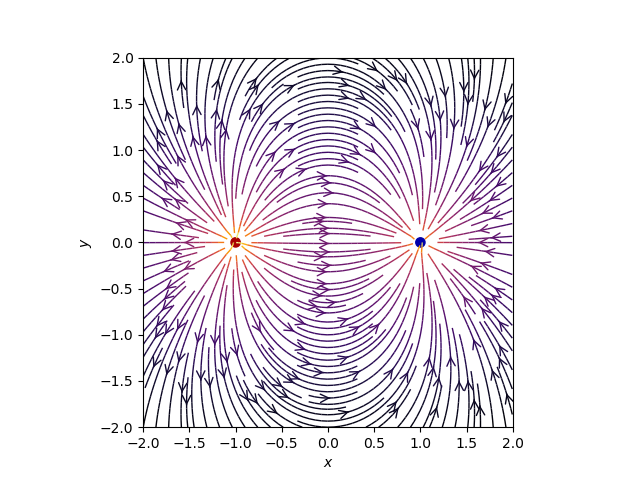

In [1]:
""" From "COMPUTATIONAL PHYSICS" & "COMPUTER PROBLEMS in PHYSICS"
    by RH Landau, MJ Paez, and CC Bordeianu (deceased).
    Copyright R Landau, Oregon State Unv, MJ Paez, Univ Antioquia, 
    C Bordeianu, Univ Bucharest, 2021. 
    Please respect copyright & acknowledge our work."""

# DipoleFieldViz.py: Visualize dipole field, based on scipython example

% matplotlib notebook

import sys, numpy as np, matplotlib.pyplot as plt
from matplotlib.patches import Circle

def E(q, r0, x, y): #   E=(Ex,Ey) due to charge q at r0. 
    den = ((x-r0[0])**2 + (y-r0[1])**2)**1.5
    return q * (x - r0[0]) / den, q * (y - r0[1]) / den

nx, ny = 64, 64  # Grid of x, y points
x = np.linspace(-2, 2, nx)
y = np.linspace(-2, 2, ny)
X, Y = np.meshgrid(x, y)

# Creat multipole of n alternating sign charges on unit circle
nq = 2  
charges = []

for i in range(nq):
    q = i%2 * 2 - 1
    charges.append((q, (np.cos(2*np.pi*i/nq), np.sin(2*np.pi*i/nq))))
Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))

for charge in charges:
    ex, ey = E(*charge, x=X, y=Y)
    Ex += ex
    Ey += ey
fig = plt.figure()
ax = fig.add_subplot(111)
color = np.log(np.sqrt(Ex**2 + Ey**2))  # Plot streamlines
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)
charge_colors = {True: '#aa0000', False: '#0000aa'} # filled circles for charges
for q, pos in charges: ax.add_artist(Circle(pos, 0.05, color=charge_colors[q>0]))
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_aspect('equal')
plt.show()